# Logistic Regression

In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import theano.tensor as tt
palette = 'muted'
sns.set_palette(palette); sns.set_color_codes(palette)
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)
sns.set()

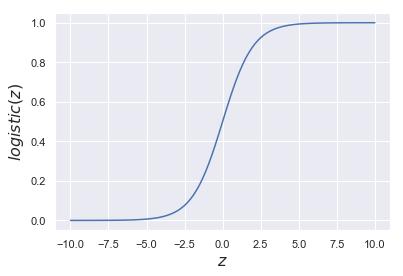

In [3]:
z = np.linspace(-10, 10, 100)
logistic = 1 / (1 + np.exp(-z))
plt.plot(z, logistic)
plt.xlabel('$z$', fontsize=16)
plt.ylabel('$logistic(z)$', fontsize=16)
plt.savefig('B04958_05_01.png', dpi=300, figsize=(5.5, 5.5))

In [3]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


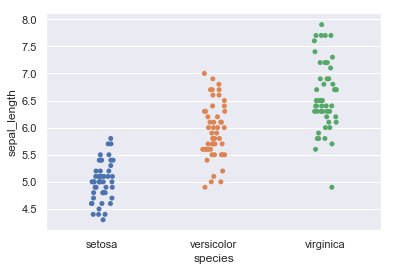

In [5]:
sns.stripplot(x="species", y="sepal_length", data=iris, jitter=True)
plt.savefig('B04958_05_03.png', dpi=300, figsize=(5.5, 5.5))

D:\application\Anaconda3\envs\pymc3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


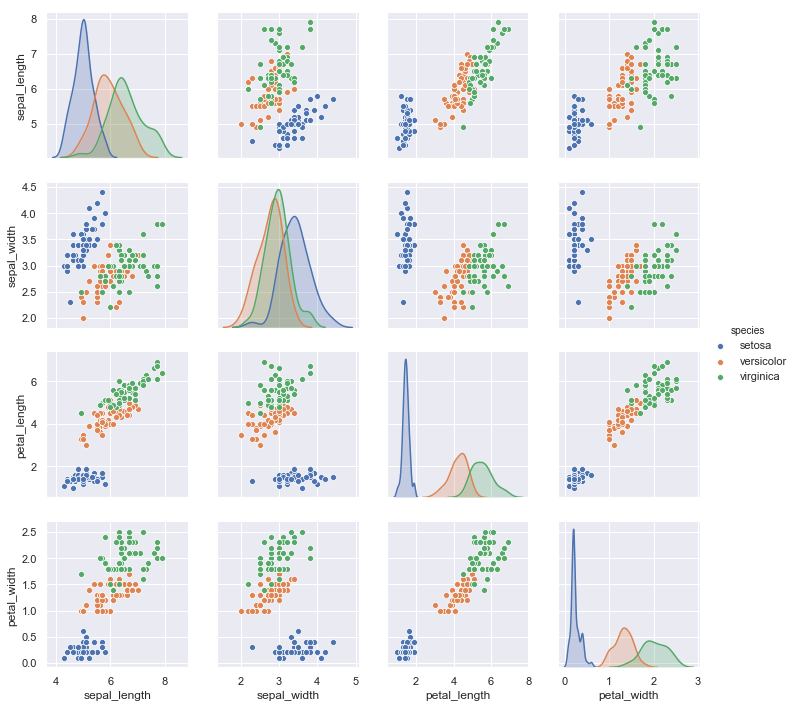

In [6]:
sns.pairplot(iris, hue='species', diag_kind='kde')
plt.savefig('B04958_05_04.png', dpi=300, figsize=(5.5, 5.5))

## 1. 将逻辑回归模型应用到莺尾花数据集

这一节利用花萼长度这一特征对setosa、versicolor进行分类

In [7]:
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length' 
x_0 = df[x_n].values

In [9]:
df[0:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
with pm.Model() as model_0:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    
    mu = alpha + pm.math.dot(x_0, beta)
    #theta = pm.Deterministic('theta', tt.nnet.sigmoid(mu))
    theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-mu)))
    
    bd = pm.Deterministic('bd', -alpha/beta)
    
    yl = pm.Bernoulli('yl', p=theta, observed=y_0)

    start = pm.find_MAP()
    step = pm.NUTS()
    trace_0 = pm.sample(5000, step, start, nchains=1)

D:\application\Anaconda3\envs\pymc3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -41.726, ||grad|| = 3.5299e-05: 100%|█████████████████████████████████████████| 23/23 [00:00<00:00, 1650.45it/s]
Sequential sampling (1 chains in 1 job)
NUTS: [beta, alpha]
100%|█████████████████████████████████████████████████████████████████████████████| 5500/5500 [00:48<00:00, 113.19it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


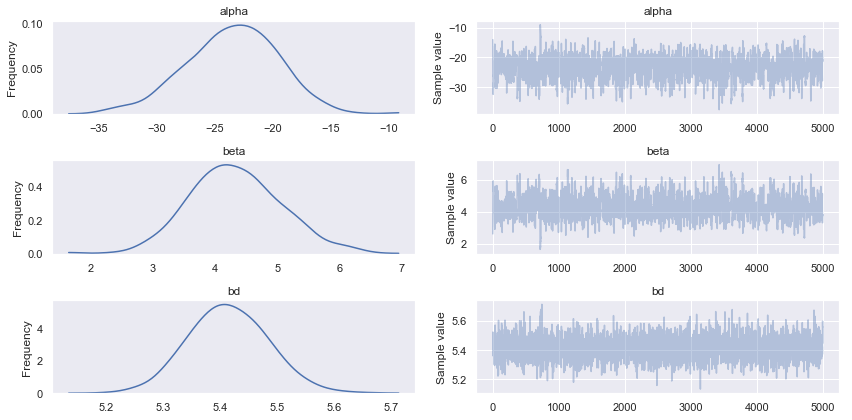

In [12]:
varnames = ['alpha', 'beta', 'bd']
pm.traceplot(trace_0, varnames)
plt.savefig('B04958_05_05.png', dpi=300, figsize=(5.5, 5.5))

In [9]:
#pm.autocorrplot(trace_0, varnames);

In [10]:
#sns.kdeplot(trace_0['alpha'], cadena_0['beta']);

In [42]:
pm.summary(trace_0, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,-23.47,3.95,1.35e-01,-30.68,-15.28
beta,4.34,0.73,2.49e-02,2.87,5.71
bd,5.41,0.07,1.02e-03,5.28,5.55


In [28]:
x_0

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

In [30]:
# 返回从小到大排序的索引
np.argsort(x_0)

array([13, 42, 38,  8, 41,  3,  6, 47, 22,  2, 29, 24, 45, 11, 30, 12, 57,
        9, 37,  1, 34, 40, 26, 25, 49, 35, 60,  7, 93,  4, 43, 44, 98, 39,
       46,  0, 19, 23, 21, 17, 32, 28, 27, 59, 48, 10, 16,  5, 20, 31, 84,
       89, 53, 36, 81, 33, 90, 80, 69, 94, 64, 88, 66, 79, 95, 96, 99, 18,
       15, 55, 67, 92, 82, 14, 70, 61, 85, 78, 83, 62, 63, 73, 71, 91, 97,
       68, 56, 87, 72, 74, 51, 54, 75, 58, 77, 86, 65, 76, 52, 50],
      dtype=int64)

In [32]:
theta = trace_0['theta'].mean(axis=0)
theta

array([0.21, 0.1 , 0.05, 0.03, 0.15, 0.49, 0.03, 0.15, 0.02, 0.1 , 0.49,
       0.07, 0.07, 0.01, 0.83, 0.77, 0.49, 0.21, 0.77, 0.21, 0.49, 0.21,
       0.03, 0.21, 0.07, 0.15, 0.15, 0.29, 0.29, 0.05, 0.07, 0.49, 0.29,
       0.59, 0.1 , 0.15, 0.59, 0.1 , 0.02, 0.21, 0.15, 0.02, 0.02, 0.15,
       0.21, 0.07, 0.21, 0.03, 0.38, 0.15, 1.  , 0.98, 1.  , 0.59, 0.99,
       0.77, 0.97, 0.1 , 0.99, 0.29, 0.15, 0.88, 0.92, 0.94, 0.69, 0.99,
       0.69, 0.83, 0.96, 0.69, 0.88, 0.94, 0.97, 0.94, 0.98, 0.99, 1.  ,
       0.99, 0.92, 0.77, 0.59, 0.59, 0.83, 0.92, 0.49, 0.92, 0.99, 0.97,
       0.69, 0.59, 0.59, 0.94, 0.83, 0.15, 0.69, 0.77, 0.77, 0.96, 0.21,
       0.77])

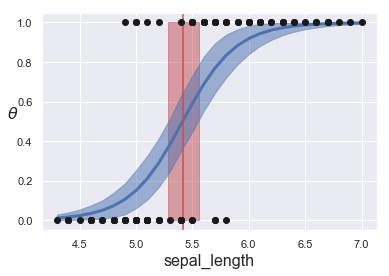

In [41]:
import math
theta = trace_0['theta'].mean(axis=0)
idx = np.argsort(x_0)
plt.plot(x_0[idx], theta[idx], color='b', lw=3);
plt.axvline(trace_0['bd'].mean(), ymax=1, color='r')
bd_hpd = pm.hpd(trace_0['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='r', alpha=0.5)

plt.plot(x_0, y_0, 'o', color='k')
theta_hpd = pm.hpd(trace_0['theta'])[idx]
plt.fill_between(x_0[idx], theta_hpd[:,0], theta_hpd[:,1], color='b', alpha=0.5)

plt.xlabel(x_n, fontsize=16)
plt.ylabel(r'$\theta$', rotation=0, fontsize=16)
plt.savefig('B04958_05_06.png', dpi=300, figsize=(5.5, 5.5))

In [43]:
def classify(n, threshold):
    """
    A simple classifying function
    """
    n = np.array(n)
    mu = trace_0['alpha'].mean() + trace_0['beta'].mean() * n
    prob = 1 / (1 + np.exp(-mu))
    return prob, prob >= threshold

classify([5, 5.5, 6], 0.5)

(array([0.14, 0.59, 0.93]), array([False,  True,  True]))

## 2. 多元逻辑回归

In [4]:
df = iris.query("species == ('setosa', 'versicolor')")
y_1 = pd.Categorical(df['species']).codes
x_n = ['sepal_length', 'sepal_width'] #['petal_length', 'petal_width'] 
x_1 = df[x_n].values

#x_1 = (x_1 - x_1.mean(axis=0))/x_1.std(axis=0) #
#x_1 = (x_1 - x_1.mean(axis=0))

In [13]:
y_0 = pd.Categorical(df['species']).codes

In [6]:
df[0:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
with pm.Model() as model_1:
    # We define the prioris
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=2, shape=len(x_n))
    
    mu = alpha + pm.math.dot(x_1, beta)
    # Aplly the logistic linking function
    theta = 1 / (1 + pm.math.exp(-mu))
    # Compute the boundary decision
    bd = pm.Deterministic('bd', -alpha/beta[1] - beta[0]/beta[1] * x_1[:,0])
    
    # Define the likelihood
    yl = pm.Bernoulli('yl', p=theta, observed=y_1)
    # Sampling
    #start = pm.find_MAP()
    #step = pm.NUTS()
    #trace_1 = pm.sample(5000, step, start)
    trace_1 = pm.sample(5000, nchains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta, alpha]
100%|█████████████████████████████████████████████████████████████████████████████| 5500/5500 [00:31<00:00, 172.86it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


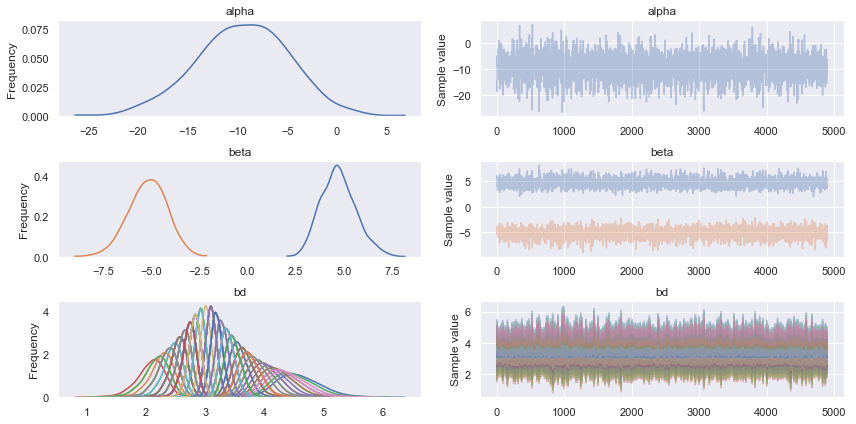

In [10]:
chain_1 = trace_1[100:]
pm.traceplot(chain_1)
plt.savefig('B04958_05_07.png', dpi=300, figsize=(5.5, 5.5))

In [11]:
pm.summary(chain_1, ['alpha', 'beta'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,-9.47,4.78,0.10,-19.94,-1.13
beta__0,4.72,0.90,0.02,3.06,6.57
beta__1,-5.17,1.00,0.02,-7.06,-3.17


In [21]:
y_0
cr  = ['r' for i in range(len(y_0))]
for i in range(len(y_0)):
    if y_0[i] == 0:
        cr[i] = 'b'
    else:
        cr[i] = 'k'
        

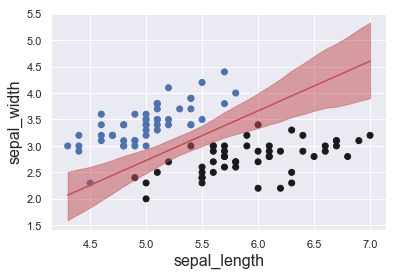

In [23]:
idx = np.argsort(x_1[:,0])
ld = chain_1['bd'].mean(0)[idx]
plt.scatter(x_1[:,0], x_1[:,1], c=cr)
plt.plot(x_1[:,0][idx], ld, color='r');

ld_hpd = pm.hpd(chain_1['bd'])[idx]
plt.fill_between(x_1[:,0][idx], ld_hpd[:,0], ld_hpd[:,1], color='r', alpha=0.5);

plt.xlabel(x_n[0], fontsize=16)
plt.ylabel(x_n[1], fontsize=16)
plt.savefig('B04958_05_08.png', dpi=300, figsize=(5.5, 5.5))

## 3. 多元逻辑回归细节

### 3.1 Correlated variables

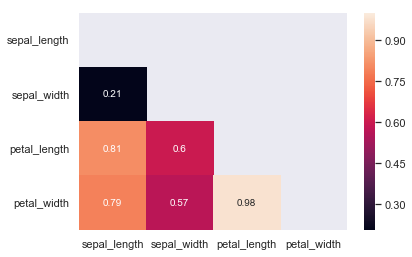

In [24]:
corr = iris[iris['species'] != 'virginica'].corr()
mask = np.tri(*corr.shape).T
sns.heatmap(corr.abs(), mask=mask, annot=True)
plt.savefig('B04958_05_09.png', dpi=300, figsize=(5.5, 5.5))

### 3.2 Unbalanced Classes

In [25]:
df = iris.query("species == ('setosa', 'versicolor')")
df = df[45:] #df[22:78]
y_3 = pd.Categorical(df['species']).codes
x_n = ['sepal_length', 'sepal_width'] 
x_3 = df[x_n].values
#plt.scatter(x_3[:,0], x_3[:,1], c=y_3)

In [26]:
with pm.Model() as model_3:
    # We define the a prioris
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=2, shape=len(x_n))
    
    mu = alpha + pm.math.dot(x_3, beta)
    # Aplly the logistic linking function
    p = 1 / (1 + pm.math.exp(-mu))
    # Compute the boundary decision
    ld = pm.Deterministic('ld', -alpha/beta[1] - beta[0]/beta[1] * x_3[:,0])
    
    # Define the likelihood
    yl = pm.Bernoulli('yl', p=p, observed=y_3)
    trace_3 = pm.sample(5000, nchains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta, alpha]
100%|█████████████████████████████████████████████████████████████████████████████| 5500/5500 [00:21<00:00, 253.75it/s]
There were 75 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


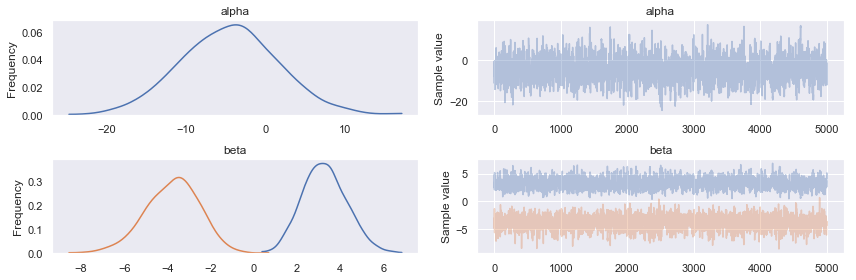

In [27]:
cadena_3 = trace_3[:]
varnames = ['alpha', 'beta']
pm.traceplot(cadena_3, varnames);

In [28]:
pm.summary(cadena_3, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,-4.50,6.06,0.16,-16.31,7.47
beta__0,3.29,1.02,0.03,1.41,5.33
beta__1,-3.76,1.25,0.03,-6.27,-1.40


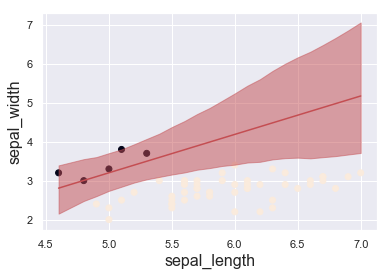

In [31]:
idx = np.argsort(x_3[:,0])
ld = trace_3['ld'].mean(0)[idx]
plt.scatter(x_3[:,0], x_3[:,1], c=y_3)
plt.plot(x_3[:,0][idx], ld, color='r');

ld_hpd = pm.hpd(trace_3['ld'])[idx]
plt.fill_between(x_3[:,0][idx], ld_hpd[:,0], ld_hpd[:,1], color='r', alpha=0.5);

plt.xlabel(x_n[0], fontsize=16)
plt.ylabel(x_n[1], fontsize=16)
plt.savefig('B04958_05_10.png', dpi=300, figsize=(5.5, 5.5))

## 练习1：Softmax logistic regression (AKA multinomial regression)

In [32]:
iris = sns.load_dataset("iris")
y_s = pd.Categorical(iris['species']).codes
x_n = iris.columns[:-1]
x_s = iris[x_n].values
x_s = (x_s - x_s.mean(axis=0))/x_s.std(axis=0)
#x_s = (x_s - x_s.mean(axis=0))

In [35]:
with pm.Model() as model_s:
    alpha = pm.Normal('alpha', mu=0, sd=2, shape=3)
    beta = pm.Normal('beta', mu=0, sd=2, shape=(4,3))

    mu = alpha + pm.math.dot(x_s, beta)
    theta = tt.nnet.softmax(mu)

    yl = pm.Categorical('yl', p=theta, observed=y_s)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace_s = pm.sample(2000, step, start, nchains=1)

D:\application\Anaconda3\envs\pymc3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -44.794, ||grad|| = 0.00029813: 100%|██████████████████████████████████████████| 32/32 [00:00<00:00, 802.30it/s]
Sequential sampling (1 chains in 1 job)
NUTS: [beta, alpha]
100%|█████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:15<00:00, 162.55it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


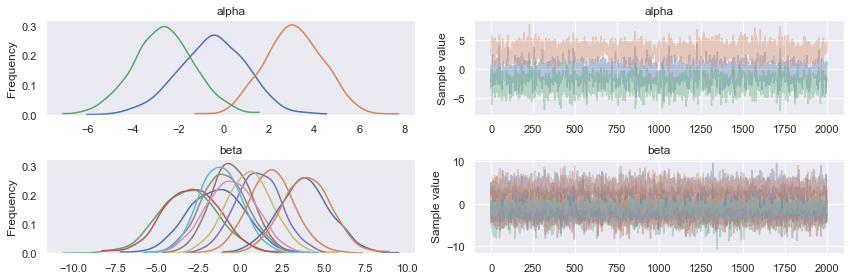

In [36]:
pm.traceplot(trace_s)
plt.savefig('B04958_05_12.png', dpi=300, figsize=(5.5, 5.5))

In [37]:
pm.summary(trace_s)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha__0,-0.51,1.49,0.04,-3.35,2.42
alpha__1,3.09,1.28,0.03,0.65,5.49
alpha__2,-2.67,1.35,0.03,-5.40,-0.07
beta__0_0,-1.46,1.71,0.04,-4.63,1.89
beta__0_1,1.07,1.36,0.04,-1.61,3.74
beta__0_2,0.54,1.38,0.04,-2.36,3.05
beta__1_0,1.85,1.38,0.03,-0.57,4.84
beta__1_1,-0.52,1.24,0.03,-2.72,2.07
beta__1_2,-1.20,1.26,0.03,-3.66,1.27
beta__2_0,-3.14,1.76,0.04,-6.38,0.40


In [29]:
#pm.autocorrplot(trace_s, varnames=['alpha']);

In [38]:
probs = trace_s['alpha'].mean(axis=0) + np.dot(x_s, trace_s['beta'].mean(axis=0))
y_pred = []
for point in probs:
    y_pred.append(np.exp(point)/np.sum(np.exp(point), axis=0))
np.sum(y_s == np.argmax(y_pred, axis=1))/len(y_s)

0.9733333333333334

In [39]:
with pm.Model() as model_sf:
    alpha = pm.Normal('alpha', mu=0, sd=2, shape=2)
    beta = pm.Normal('beta', mu=0, sd=2, shape=(4,2))
    
    alpha_f = tt.concatenate([[0] , alpha])
    beta_f = tt.concatenate([np.zeros((4,1)) , beta], axis=1)

    mu = alpha_f + pm.math.dot(x_s, beta_f)
    theta = tt.nnet.softmax(mu)

    yl = pm.Categorical('yl', p=theta, observed=y_s)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace_sf = pm.sample(2000, step, start, nchains=1)

D:\application\Anaconda3\envs\pymc3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
  0%|                                                                                         | 0/5000 [00:00<?, ?it/s]D:\application\Anaconda3\envs\pymc3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
logp = -42.148, ||grad|| = 0.00098897: 100%|████████████████████████████

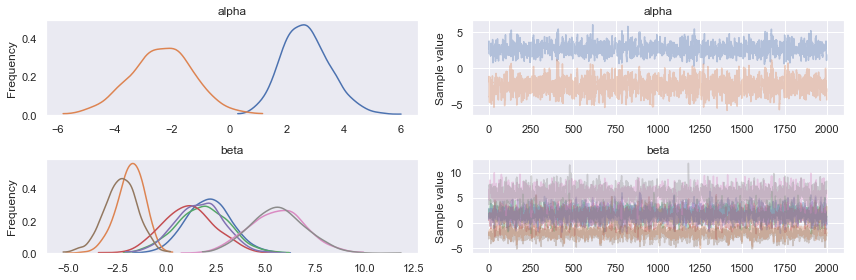

In [40]:
pm.traceplot(trace_sf)
plt.savefig('B04958_05_13.png', dpi=300, figsize=(5.5, 5.5))

In [41]:
pm.summary(trace_sf)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha__0,2.68,0.83,0.02,1.16,4.39
alpha__1,-2.38,1.11,0.03,-4.59,-0.22
beta__0_0,2.12,1.15,0.03,-0.08,4.41
beta__0_1,1.64,1.21,0.03,-0.61,4.12
beta__1_0,-1.84,0.71,0.02,-3.30,-0.59
beta__1_1,-2.34,0.84,0.03,-3.89,-0.62
beta__2_0,1.80,1.34,0.03,-0.78,4.50
beta__2_1,5.57,1.43,0.04,2.59,8.20
beta__3_0,1.10,1.33,0.04,-1.38,3.71
beta__3_1,5.62,1.39,0.04,2.98,8.30


## 练习2：Linear discriminat Analysis

In [34]:
iris = sns.load_dataset("iris")
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length' 
x_0 = df[x_n].values

In [35]:
with pm.Model() as model_lda:

    mus = pm.Normal('mus', mu=0, sd=10, shape=2)
    sigma = pm.HalfCauchy('sigma', 5)
    
    setosa = pm.Normal('setosa', mu=mus[0], sd=sigma, observed=x_0[:50])
    versicolor = pm.Normal('versicolor', mu=mus[1], sd=sigma, observed=x_0[50:])
    
    bd = pm.Deterministic('bd', (mus[0]+mus[1])/2)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace_lda = pm.sample(5000, step, start)

100%|██████████| 5000/5000 [00:08<00:00, 605.56it/s]


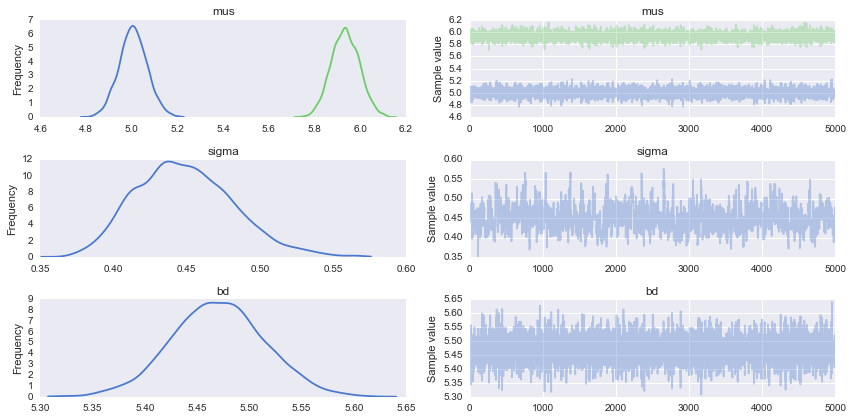

In [36]:
pm.traceplot(trace_lda)
plt.savefig('B04958_05_14.png', dpi=300, figsize=(5.5, 5.5))

In [37]:
pm.df_summary(trace_lda)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
mus__0,5.01,0.06,8.16e-04,4.88,5.13
mus__1,5.93,0.06,6.28e-04,5.81,6.06
sigma,0.45,0.03,1.52e-03,0.38,0.51
bd,5.47,0.05,5.36e-04,5.38,5.56


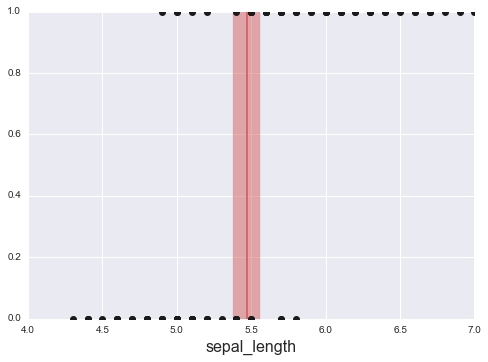

In [38]:
plt.axvline(trace_lda['bd'].mean(), ymax=1, color='r')
bd_hpd = pm.hpd(trace_lda['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='r', alpha=0.5)

plt.plot(x_0, y_0, 'o', color='k')

plt.xlabel(x_n, fontsize=16)
plt.savefig('B04958_05_15.png', dpi=300, figsize=(5.5, 5.5))

In [39]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was created on a %s computer running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nSciPy %s\nMatplotlib %s\nSeaborn %s\nPandas %s" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, scipy.__version__, matplotlib.__version__, sns.__version__, pd.__version__))

This notebook was created on a x86_64 computer running debian stretch/sid and using:
Python 3.5.2
IPython 5.0.0
PyMC3 3.0.rc2
NumPy 1.11.1
SciPy 0.18.1
Matplotlib 1.5.3
Seaborn 0.7.1
Pandas 0.19.0
